In [1]:
# import zipfile
# f = zipfile.ZipFile("ETT_v3.zip",'r') # 原压缩文件在服务器的位置
# for file in f.namelist():
#     f.extract(file,".")# 解压到的位置
# f.close()

In [1]:
# 超參數
# learning rate
LR = 0.0001
NUM_EPOCHS=1000
batch_sizes=4

# data preprocess

In [2]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
def image_preprocess(file_paths):
    img_save=[]
    crop_img=[]
    init_img=[]
    count=0
    for file_path in file_paths:
        count+=1
        with Image.open(file_path) as img:
            
            #如果是彩色轉灰階
            if img.mode in ['RGB', 'RGBA']:
                img = img.convert('L') 
            # print(img.size)    
            # 獲取圖像大小                
            width, height = img.size
             
            # 計算裁剪區域的左上角和右下角坐標
            left = 0+(width//4)
            top = 0
            right = width-(width//4)
            bottom = height-(height//4)

            # 裁剪圖像
            cropped_img = img.crop((left, top, right, bottom))
            final_img = cropped_img.resize((320,320)) 
            # print(cropped_img.size)
            # plt.imshow(cropped_img) 
            # plt.show()    
            # final_img.show()
    #         print('原始size：',img.size)#(2517,3028)
    #         print('切割後size：',cropped_img.size)#(1259,1514)
    #         print('最終size：'final_img.size)#(256,256)
            img_save.append(np.array(final_img))
            crop_img.append(np.array(cropped_img))
            init_img.append(np.array(img))        

    return np.array(init_img),np.array(crop_img),np.array(img_save).astype(np.float32)   


In [4]:
# import pandas as pd
# df = pd.DataFrame(columns=['type', 'fold', 'img_path', 'mask_path'])
# for i in [1, 2, 3, 4, 5]:
#     for d in ['train', 'val', 'test']:
#         imgs  = []
#         masks = []
#         for f in os.listdir(f'ETT_v3/ETT_v3/Fold{i}/{d}'):
#             imgs.append(f'ETT_v3/ETT_v3/Fold{i}/{d}/{f}')

#         for f in os.listdir(f'ETT_v3/ETT_v3/Fold{i}/{d}annot'):
#             masks.append(f'ETT_v3/ETT_v3/Fold{i}/{d}annot/{f}')
            
#         l = len(os.listdir(f'ETT_v3/ETT_v3/Fold{i}/{d}'))
#         for j in range(l):
#             img_path  = imgs[j]
#             mask_path = masks[j]
#             df = pd.concat([df, pd.DataFrame([[d, f'Fold{i}', img_path, mask_path]], columns=['type', 'fold', 'img_path', 'mask_path'])], axis=0)
# df = df.reset_index(drop=True)
# df

In [3]:
# # 資料夾路徑
folder_path = 'ETT_v3/ETT_v3/Fold1/train'
# 取得資料夾中所有JPEG檔案的路徑
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')]
init_fold1_train,crop_fold1_train,fold1_train=image_preprocess(file_paths) 

folder_path = 'ETT_v3/ETT_v3/Fold1/trainannot'
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.png')]
init_fold1_trainannot,crop_fold1_trainannot,fold1_trainannot=image_preprocess(file_paths) 

print('fold1_train',fold1_train.shape)
print('fold1_trainannot',fold1_trainannot.shape)

# 資料夾路徑
folder_path = 'ETT_v3/ETT_v3/Fold1/val'
# 取得資料夾中所有JPEG檔案的路徑
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')]
init_fold1_val,crop_fold1_val,fold1_val=image_preprocess(file_paths) 

folder_path = 'ETT_v3/ETT_v3/Fold1/valannot'
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.png')]
init_fold1_valannot,crop_fold1_valannot,fold1_valannot=image_preprocess(file_paths)
print('fold1_val',fold1_val.shape)  
print('fold1_valannot',fold1_valannot.shape)

# 資料夾路徑
folder_path = 'ETT_v3/ETT_v3/Fold1/test'
# 取得資料夾中所有JPEG檔案的路徑
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')]
init_fold1_test,crop_fold1_test,fold1_test=image_preprocess(file_paths) 

folder_path = 'ETT_v3/ETT_v3/Fold1/testannot'
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.png')]
init_fold1_testannot,crop_fold1_testannot,fold1_testannot=image_preprocess(file_paths)


print('fold1_test',fold1_test.shape)
print('fold1_testannot',fold1_testannot.shape)



C:\Users\MB20705\AppData\Local\Temp\ipykernel_23992\1692377459.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(init_img),np.array(crop_img),np.array(img_save).astype(np.float32)


fold1_train (287, 320, 320)
fold1_trainannot (287, 320, 320)
fold1_val (47, 320, 320)
fold1_valannot (47, 320, 320)
fold1_test (47, 320, 320)
fold1_testannot (47, 320, 320)


In [4]:
# np.unique(fold1_trainannot[0])
import cv2

for i in range(len(fold1_trainannot)):
    _,fold1_trainannot[i]=cv2.threshold(fold1_trainannot[i], 127, 255, cv2.THRESH_BINARY)#cv2.threshold函數返回的是二值化後的圖像以及閾值，因此會有兩個返回
for i in range(len(fold1_valannot)):
    _,fold1_valannot[i]=cv2.threshold(fold1_valannot[i], 127, 255, cv2.THRESH_BINARY)#cv2.threshold函數返回的是二值化後的圖像以及閾值，因此會有兩個返回
for i in range(len(fold1_valannot)):
    _,fold1_testannot[i]=cv2.threshold(fold1_testannot[i], 127, 255, cv2.THRESH_BINARY)#cv2.threshold函數返回的是二值化後的圖像以及閾值，因此會有兩個返回    

In [7]:
np.unique(fold1_trainannot)

array([  0., 255.], dtype=float32)

(320, 320)


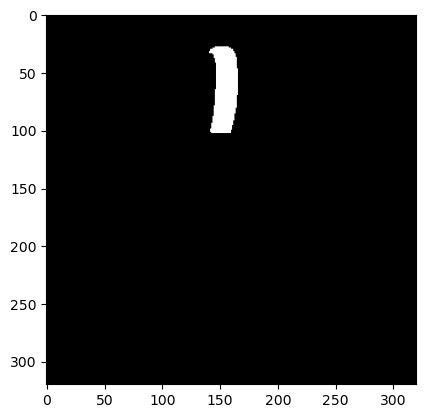

(320, 320)


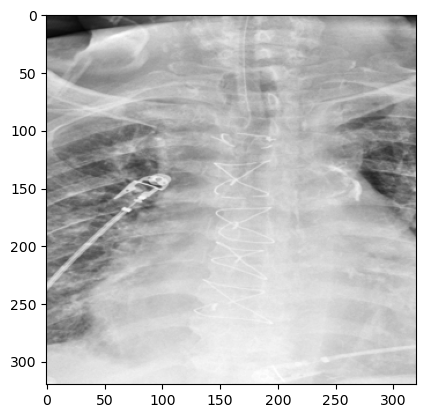

In [8]:
import matplotlib.pyplot as plt
#預設灰階圖顯示維綠色，因此須設定為灰色
plt.rcParams['image.cmap'] = 'gray'
print(fold1_train[0].shape)
plt.imshow(fold1_trainannot[0] )
plt.show()

plt.rcParams['image.cmap'] = 'gray'
print(fold1_val[0].shape)
plt.imshow(fold1_val[0] )
plt.show()


# data augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
#資料增強
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                    #  zoom_range=[random.uniform(0.8, 1.2),random.uniform(0.8, 1.2)],
                     horizontal_flip=True,
                     )

X_datagen = ImageDataGenerator(**data_gen_args)
Y_datagen = ImageDataGenerator(**data_gen_args)
X_datagen_val = ImageDataGenerator()
Y_datagen_val = ImageDataGenerator()

#標準化
fold1_train=fold1_train/255
fold1_val=fold1_val/255
fold1_trainannot=fold1_trainannot/255
fold1_valannot=fold1_valannot/255

#將資料擴增(287,256,256)->(287,256,256,1)
fold1_train_augm=np.expand_dims(fold1_train, axis=-1) 
fold1_trainannot_augm=np.expand_dims(fold1_trainannot, axis=-1)
fold1_val_augm=np.expand_dims(fold1_val, axis=-1) 
fold1_valannot_augm=np.expand_dims(fold1_valannot, axis=-1)  

X_datagen.fit(fold1_train_augm, augment=True, seed=13)
Y_datagen.fit(fold1_trainannot_augm, augment=True, seed=13)
X_datagen_val.fit(fold1_val_augm, augment=False, seed=13)
Y_datagen_val.fit(fold1_valannot_augm, augment=False, seed=13)

In [10]:
fold1_train_augmed = X_datagen.flow(fold1_train_augm,batch_size=batch_sizes, shuffle=True, seed=13)
fold1_trainannot_augmed = Y_datagen.flow(fold1_trainannot_augm,batch_size=batch_sizes, shuffle=True, seed=13)

fold1_val_augm = X_datagen_val.flow(fold1_val_augm, batch_size=batch_sizes, shuffle=True, seed=13)
fold1_valannot_augm = Y_datagen_val.flow(fold1_valannot_augm, batch_size=batch_sizes, shuffle=True, seed=13)
train_generator=zip(fold1_train_augmed,fold1_trainannot_augmed)
val_generator=zip(fold1_val_augm,fold1_valannot_augm)

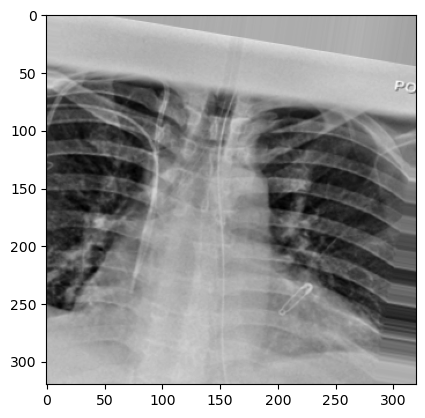

[0.05599247 0.05934604 0.05945758 ... 0.9543836  0.95802766 0.9684308 ]


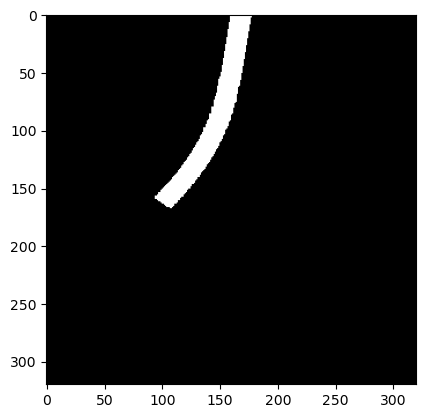

In [11]:
for x,y in train_generator:
    plt.imshow(x[0])
    plt.show()
    plt.imshow(np.where(y[0]>0.5,255,0))
    print(np.unique(x[0]))
    plt.show()
    break

In [12]:
np.unique(fold1_trainannot_augm)

array([0., 1.], dtype=float32)

# 模型架構

In [5]:
# import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dropout,MaxPooling2D,Conv2DTranspose,concatenate
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split

from tensorflow.keras import Input # for instantiating a keras tensor
from tensorflow.keras.layers import Dense # for creating regular densely-connected NN layers.
import tensorflow as tf
from __future__ import absolute_import

from keras_unet_collection.layer_utils import *
from keras_unet_collection.transformer_layers import patch_extract, patch_embedding, SwinTransformerBlock, patch_merging, patch_expanding

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [6]:
from __future__ import absolute_import

from keras_unet_collection.layer_utils import *
from keras_unet_collection.activations import GELU, Snake
from keras_unet_collection._model_unet_2d import UNET_left, UNET_right
from keras_unet_collection.transformer_layers import patch_extract, patch_embedding
from keras_unet_collection._backbone_zoo import backbone_zoo, bach_norm_checker

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, MultiHeadAttention, LayerNormalization, Dense, Embedding
    
def ViT_MLP(X, filter_num, activation='GELU', name='MLP'):
    '''
    The MLP block of ViT.
    
    ----------
    Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., Zhai, X., Unterthiner, 
    T., Dehghani, M., Minderer, M., Heigold, G., Gelly, S. and Uszkoreit, J., 2020. 
    An image is worth 16x16 words: Transformers for image recognition at scale. 
    arXiv preprint arXiv:2010.11929.
    
    Input
    ----------
        X: the input tensor of MLP, i.e., after MSA and skip connections
        filter_num: a list that defines the number of nodes for each MLP layer.
                        For the last MLP layer, its number of node must equal to the dimension of key.
        activation: activation of MLP nodes.
        name: prefix of the created keras layers.
        
    Output
    ----------
        V: output tensor.
    '''
    activation_func = eval(activation)
    
    for i, f in enumerate(filter_num):
        X = Dense(f, name='{}_dense_{}'.format(name, i))(X)
        X = activation_func(name='{}_activation_{}'.format(name, i))(X)
        
    return X
    
def ViT_block(V, num_heads, key_dim, filter_num_MLP, activation='GELU', name='ViT'):
    '''
    
    Vision transformer (ViT) block.
    
    ViT_block(V, num_heads, key_dim, filter_num_MLP, activation='GELU', name='ViT')
    
    ----------
    Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., Zhai, X., Unterthiner, 
    T., Dehghani, M., Minderer, M., Heigold, G., Gelly, S. and Uszkoreit, J., 2020. 
    An image is worth 16x16 words: Transformers for image recognition at scale. 
    arXiv preprint arXiv:2010.11929.
    
    Input
    ----------
        V: embedded input features.
        num_heads: number of attention heads.
        key_dim: dimension of the attention key (equals to the embeded dimensions).
        filter_num_MLP: a list that defines the number of nodes for each MLP layer.
                        For the last MLP layer, its number of node must equal to the dimension of key.
        activation: activation of MLP nodes.
        name: prefix of the created keras layers.
        
    Output
    ----------
        V: output tensor.
    
    '''
    # Multiheaded self-attention (MSA)
    V_atten = V # <--- skip
    V_atten = LayerNormalization(name='{}_layer_norm_1'.format(name))(V_atten)
    V_atten = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim, 
                                 name='{}_atten'.format(name))(V_atten, V_atten)
    # Skip connection
    V_add = add([V_atten, V], name='{}_skip_1'.format(name)) # <--- skip
    
    # MLP
    V_MLP = V_add # <--- skip
    V_MLP = LayerNormalization(name='{}_layer_norm_2'.format(name))(V_MLP)
    V_MLP = ViT_MLP(V_MLP, filter_num_MLP, activation, name='{}_mlp'.format(name))
    # Skip connection
    V_out = add([V_MLP, V_add], name='{}_skip_2'.format(name)) # <--- skip
    
    return V_out


def transunet_2d_base(input_tensor, filter_num, stack_num_down=2, stack_num_up=2, 
                      embed_dim=768, num_mlp=3072, num_heads=12, num_transformer=12,
                      activation='ReLU', mlp_activation='GELU', batch_norm=False, pool=True, unpool=True, 
                      backbone=None, weights='imagenet', freeze_backbone=True, freeze_batch_norm=True, name='transunet'):
    '''
    The base of transUNET with an optional ImageNet-trained backbone.
    
    ----------
    Chen, J., Lu, Y., Yu, Q., Luo, X., Adeli, E., Wang, Y., Lu, L., Yuille, A.L. and Zhou, Y., 2021. 
    Transunet: Transformers make strong encoders for medical image segmentation. arXiv preprint arXiv:2102.04306.
    
    Input
    ----------
        input_tensor: the input tensor of the base, e.g., `keras.layers.Inpyt((None, None, 3))`.
        filter_num: a list that defines the number of filters for each \
                    down- and upsampling levels. e.g., `[64, 128, 256, 512]`.
                    The depth is expected as `len(filter_num)`.
        stack_num_down: number of convolutional layers per downsampling level/block. 
        stack_num_up: number of convolutional layers (after concatenation) per upsampling level/block.
        activation: one of the `tensorflow.keras.layers` or `keras_unet_collection.activations` interfaces, e.g., 'ReLU'.
        batch_norm: True for batch normalization.
        pool: True or 'max' for MaxPooling2D.
              'ave' for AveragePooling2D.
              False for strided conv + batch norm + activation.
        unpool: True or 'bilinear' for Upsampling2D with bilinear interpolation.
                'nearest' for Upsampling2D with nearest interpolation.
                False for Conv2DTranspose + batch norm + activation.
        name: prefix of the created keras model and its layers.
        
        ---------- (keywords of ViT) ----------
        embed_dim: number of embedded dimensions.
        num_mlp: number of MLP nodes.
        num_heads: number of attention heads.
        num_transformer: number of stacked ViTs.
        mlp_activation: activation of MLP nodes.
        
        ---------- (keywords of backbone options) ----------
        backbone_name: the bakcbone model name. Should be one of the `tensorflow.keras.applications` class.
                       None (default) means no backbone. 
                       Currently supported backbones are:
                       (1) VGG16, VGG19
                       (2) ResNet50, ResNet101, ResNet152
                       (3) ResNet50V2, ResNet101V2, ResNet152V2
                       (4) DenseNet121, DenseNet169, DenseNet201
                       (5) EfficientNetB[0-7]
        weights: one of None (random initialization), 'imagenet' (pre-training on ImageNet), 
                 or the path to the weights file to be loaded.
        freeze_backbone: True for a frozen backbone.
        freeze_batch_norm: False for not freezing batch normalization layers.
        
    Output
    ----------
        X: output tensor.
    
    '''
    activation_func = eval(activation)
    
    X_skip = []
    depth_ = len(filter_num)
    
    # ----- internal parameters ----- #
    
    # patch size (fixed to 1-by-1)
    patch_size = 1
    
    # input tensor size
    input_size = input_tensor.shape[1]
    
    # encoded feature map size
    encode_size = input_size // 2**(depth_-1)
    
    # number of size-1 patches
    num_patches = encode_size ** 2 
    
    # dimension of the attention key (= dimension of embedings)
    key_dim = embed_dim
    
    # number of MLP nodes
    filter_num_MLP = [num_mlp, embed_dim]
    
    # ----- UNet-like downsampling ----- #
    
    # no backbone cases
    if backbone is None:

        X = input_tensor

        # stacked conv2d before downsampling
        X = CONV_stack(X, filter_num[0], stack_num=stack_num_down, activation=activation, 
                       batch_norm=batch_norm, name='{}_down0'.format(name))
        X_skip.append(X)

        # downsampling blocks
        for i, f in enumerate(filter_num[1:]):
            X = UNET_left(X, f, stack_num=stack_num_down, activation=activation, pool=pool, 
                          batch_norm=batch_norm, name='{}_down{}'.format(name, i+1))        
            X_skip.append(X)

    # backbone cases
    else:
        # handling VGG16 and VGG19 separately
        if 'VGG' in backbone:
            backbone_ = backbone_zoo(backbone, weights, input_tensor, depth_, freeze_backbone, freeze_batch_norm)
            # collecting backbone feature maps
            X_skip = backbone_([input_tensor,])
            depth_encode = len(X_skip)
            
        # for other backbones
        else:
            backbone_ = backbone_zoo(backbone, weights, input_tensor, depth_-1, freeze_backbone, freeze_batch_norm)
            # collecting backbone feature maps
            X_skip = backbone_([input_tensor,])
            depth_encode = len(X_skip) + 1


        # extra conv2d blocks are applied
        # if downsampling levels of a backbone < user-specified downsampling levels
        if depth_encode < depth_:

            # begins at the deepest available tensor  
            X = X_skip[-1]

            # extra downsamplings
            for i in range(depth_-depth_encode):
                i_real = i + depth_encode

                X = UNET_left(X, filter_num[i_real], stack_num=stack_num_down, activation=activation, pool=pool, 
                              batch_norm=batch_norm, name='{}_down{}'.format(name, i_real+1))
                X_skip.append(X)
        
    # subtrack the last tensor (will be replaced by the ViT output)
    X = X_skip[-1]
    X_skip = X_skip[:-1]

    # 1-by-1 linear transformation before entering ViT blocks
    X = Conv2D(filter_num[-1], 1, padding='valid', use_bias=False, name='{}_conv_trans_before'.format(name))(X)

    X = patch_extract((patch_size, patch_size))(X)
    X = patch_embedding(num_patches, embed_dim)(X)

    # stacked ViTs 
    for i in range(num_transformer):
        X = ViT_block(X, num_heads, key_dim, filter_num_MLP, activation=mlp_activation, 
                      name='{}_ViT_{}'.format(name, i))

    # reshape patches to feature maps
    X = tf.reshape(X, (-1, encode_size, encode_size, embed_dim))

    # 1-by-1 linear transformation to adjust the number of channels
    X = Conv2D(filter_num[-1], 1, padding='valid', use_bias=False, name='{}_conv_trans_after'.format(name))(X)

    X_skip.append(X)
    
    # ----- UNet-like upsampling ----- #
    
    # reverse indexing encoded feature maps
    X_skip = X_skip[::-1]
    # upsampling begins at the deepest available tensor
    X = X_skip[0]
    # other tensors are preserved for concatenation
    X_decode = X_skip[1:]
    depth_decode = len(X_decode)

    # reverse indexing filter numbers
    filter_num_decode = filter_num[:-1][::-1]

    # upsampling with concatenation
    for i in range(depth_decode):
        X = UNET_right(X, [X_decode[i],], filter_num_decode[i], stack_num=stack_num_up, activation=activation, 
                       unpool=unpool, batch_norm=batch_norm, name='{}_up{}'.format(name, i))

    # if tensors for concatenation is not enough
    # then use upsampling without concatenation 
    if depth_decode < depth_-1:
        for i in range(depth_-depth_decode-1):
            i_real = i + depth_decode
            X = UNET_right(X, None, filter_num_decode[i_real], stack_num=stack_num_up, activation=activation, 
                       unpool=unpool, batch_norm=batch_norm, concat=False, name='{}_up{}'.format(name, i_real))
            
    return X

def transunet_2d(input_size, filter_num, n_labels, stack_num_down=2, stack_num_up=2,
                 embed_dim=768, num_mlp = 3072, num_heads=12, num_transformer=12,
                 activation='ReLU', mlp_activation='GELU', output_activation='Softmax', batch_norm=False, pool=True, unpool=True, 
                 backbone=None, weights='imagenet', freeze_backbone=True, freeze_batch_norm=True, name='transunet'):
    '''
    TransUNET with an optional ImageNet-trained bakcbone.
    
    
    ----------
    Chen, J., Lu, Y., Yu, Q., Luo, X., Adeli, E., Wang, Y., Lu, L., Yuille, A.L. and Zhou, Y., 2021. 
    Transunet: Transformers make strong encoders for medical image segmentation. arXiv preprint arXiv:2102.04306.
    
    Input
    ----------
        input_size: the size/shape of network input, e.g., `(128, 128, 3)`.
        filter_num: a list that defines the number of filters for each \
                    down- and upsampling levels. e.g., `[64, 128, 256, 512]`.
                    The depth is expected as `len(filter_num)`.
        n_labels: number of output labels.
        stack_num_down: number of convolutional layers per downsampling level/block. 
        stack_num_up: number of convolutional layers (after concatenation) per upsampling level/block.
        activation: one of the `tensorflow.keras.layers` or `keras_unet_collection.activations` interfaces, e.g., 'ReLU'.
        output_activation: one of the `tensorflow.keras.layers` or `keras_unet_collection.activations` interface or 'Sigmoid'.
                           Default option is 'Softmax'.
                           if None is received, then linear activation is applied.
        batch_norm: True for batch normalization.
        pool: True or 'max' for MaxPooling2D.
              'ave' for AveragePooling2D.
              False for strided conv + batch norm + activation.
        unpool: True or 'bilinear' for Upsampling2D with bilinear interpolation.
                'nearest' for Upsampling2D with nearest interpolation.
                False for Conv2DTranspose + batch norm + activation.                 
        name: prefix of the created keras model and its layers.
        
        ---------- (keywords of ViT) ----------
        embed_dim: number of embedded dimensions.
        num_mlp: number of MLP nodes.
        num_heads: number of attention heads.
        num_transformer: number of stacked ViTs.
        mlp_activation: activation of MLP nodes.
        
        ---------- (keywords of backbone options) ----------
        backbone_name: the bakcbone model name. Should be one of the `tensorflow.keras.applications` class.
                       None (default) means no backbone. 
                       Currently supported backbones are:
                       (1) VGG16, VGG19
                       (2) ResNet50, ResNet101, ResNet152
                       (3) ResNet50V2, ResNet101V2, ResNet152V2
                       (4) DenseNet121, DenseNet169, DenseNet201
                       (5) EfficientNetB[0-7]
        weights: one of None (random initialization), 'imagenet' (pre-training on ImageNet), 
                 or the path to the weights file to be loaded.
        freeze_backbone: True for a frozen backbone.
        freeze_batch_norm: False for not freezing batch normalization layers.
        
    Output
    ----------
        model: a keras model.
    
    '''
    
    activation_func = eval(activation)
        
    IN = Input(input_size)
    
    # base    
    X = transunet_2d_base(IN, filter_num, stack_num_down=stack_num_down, stack_num_up=stack_num_up, 
                          embed_dim=embed_dim, num_mlp=num_mlp, num_heads=num_heads, num_transformer=num_transformer,
                          activation=activation, mlp_activation=mlp_activation, batch_norm=batch_norm, pool=pool, unpool=unpool,
                          backbone=backbone, weights=weights, freeze_backbone=freeze_backbone, freeze_batch_norm=freeze_batch_norm, name=name)
    
    # output layer
    OUT = CONV_output(X, n_labels, kernel_size=1, activation=output_activation, name='{}_output'.format(name))
    
    # functional API model
    model = Model(inputs=[IN,], outputs=[OUT,], name='{}_model'.format(name))
    
    return model

In [7]:
def DICE(y_true, y_pred, smooth=1):#1e-6
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))


def BCE(y_true, y_pred):
    return 0.01 * tf.keras.losses.binary_crossentropy(y_true, y_pred)



def BCE_DICE_loss(y_true, y_pred):
    return BCE(y_true, y_pred) + DICE(y_true, y_pred)

def IoU(y_true,y_pred, smooth=1):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)    
    intersection = K.sum(y_true * y_pred)+smooth
    union = (K.sum(y_true) + K.sum(y_pred) + smooth)  
    return intersection/union

def iou_seg(y_true, y_pred, dtype=tf.float32):
    """
    Inersection over Union (IoU) loss for segmentation maps. 
    
    iou_seg(y_true, y_pred, dtype=tf.float32)
    
    ----------
    Rahman, M.A. and Wang, Y., 2016, December. Optimizing intersection-over-union in deep neural networks for 
    image segmentation. In International symposium on visual computing (pp. 234-244). Springer, Cham.
    
    ----------
    Input
        y_true: segmentation targets, c.f. `keras.losses.categorical_crossentropy`
        y_pred: segmentation predictions.
        
        dtype: the data type of input tensors.
               Default is tf.float32.
        
    """

    # tf tensor casting
    y_pred = tf.convert_to_tensor(y_pred)
    y_pred = tf.cast(y_pred, dtype)
    y_true = tf.cast(y_true, y_pred.dtype)

    y_pred = tf.squeeze(y_pred)
    y_true = tf.squeeze(y_true)
    
    y_true_pos = tf.reshape(y_true, [-1])
    y_pred_pos = tf.reshape(y_pred, [-1])

    area_intersect = tf.reduce_sum(tf.multiply(y_true_pos, y_pred_pos))
    
    area_true = tf.reduce_sum(y_true_pos)
    area_pred = tf.reduce_sum(y_pred_pos)
    area_union = area_true + area_pred - area_intersect
    
    return 1-tf.math.divide_no_nan(area_intersect, area_union)    


In [8]:
model = transunet_2d((320, 320, 1), filter_num=[64, 128, 256, 512], n_labels=1, stack_num_down=2, stack_num_up=2,
                                embed_dim=768, num_mlp=512, num_heads=2, num_transformer=10,
                                activation='ReLU', mlp_activation='GELU', output_activation='Sigmoid', 
                                batch_norm=True, pool=True, unpool='bilinear', name='transunet')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss=iou_seg,metrics=[BCE_DICE_loss,BCE,DICE,IoU])

In [17]:
# # Custom loss function
# def dice_coef(y_true, y_pred):
#     smooth = 1.
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# def bce_dice_loss(y_true, y_pred):
#     return 0.5 * tf.keras.losses.binary_crossentropy(y_true, y_pred) - dice_coef(y_true, y_pred)

In [18]:
model.summary()

Model: "transunet_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 320, 320, 1) 0                                            
__________________________________________________________________________________________________
transunet_down0_0 (Conv2D)      (None, 320, 320, 64) 576         input_1[0][0]                    
__________________________________________________________________________________________________
transunet_down0_0_bn (BatchNorm (None, 320, 320, 64) 256         transunet_down0_0[0][0]          
__________________________________________________________________________________________________
transunet_down0_0_activation (R (None, 320, 320, 64) 0           transunet_down0_0_bn[0][0]       
____________________________________________________________________________________

# run model

In [19]:
# count=0
# for i,j in train_generator:
#     print(i.shape)
#     count+=1
# count    
next(iter(X_datagen.flow(fold1_train_augm,fold1_trainannot_augm,batch_size=batch_sizes, shuffle=True, seed=13)[1])).shape

(4, 320, 320, 1)

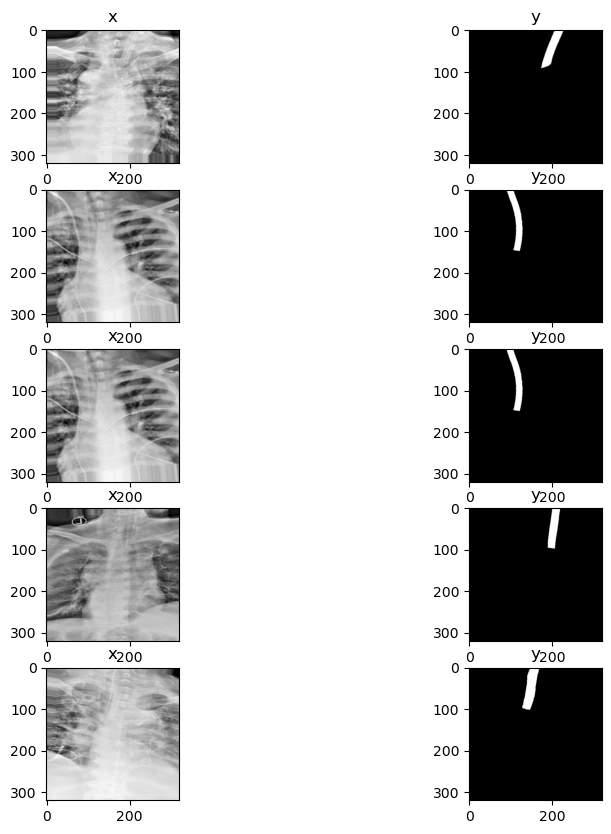

In [20]:
import matplotlib.pyplot as plt
for X_batch, y_batch in train_generator:
    f, axarr=plt.subplots(5,2)
    f.set_size_inches(10,10)
    # 產生一個3x3網格的組合圖像
    for i in range(5):
        c=0
        ix = random.randint(0,len(X_batch)-1)        
        axarr[i,c].imshow(X_batch[ix])        
        axarr[i,c].set_title('x') 
        axarr[i,c+1].imshow(y_batch[ix])        
        axarr[i,c+1].set_title('y')          
    plt.show()
    break # 跳出迴圈

In [21]:
#有無在gpu上面跑
import tensorflow as tf
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [22]:
#檢查輸入和label樣本數有無對齊
# while(True):
#     x,y=next(iter(train_generator))
#     print('x',x.shape)
#     print('y',y.shape)
import math
for i in range(math.ceil(len(fold1_val)/batch_sizes)):
    x,y=next(iter(val_generator)) 
    print('x',x.shape)
    print('y',y.shape)    

x (4, 320, 320, 1)
y (4, 320, 320, 1)
x (4, 320, 320, 1)
y (4, 320, 320, 1)
x (4, 320, 320, 1)
y (4, 320, 320, 1)
x (4, 320, 320, 1)
y (4, 320, 320, 1)
x (4, 320, 320, 1)
y (4, 320, 320, 1)
x (4, 320, 320, 1)
y (4, 320, 320, 1)
x (4, 320, 320, 1)
y (4, 320, 320, 1)
x (4, 320, 320, 1)
y (4, 320, 320, 1)
x (4, 320, 320, 1)
y (4, 320, 320, 1)
x (4, 320, 320, 1)
y (4, 320, 320, 1)
x (4, 320, 320, 1)
y (4, 320, 320, 1)
x (4, 320, 320, 1)
y (4, 320, 320, 1)


In [23]:
import math
checkpoint = ModelCheckpoint('fold5_best_model_4.h5' , 
                             monitor = 'val_loss', 
                             verbose = 1, 
                             save_best_only=True,
                             mode = 'min',
                             save_weights_only=False,
                             save_freq='epoch'
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8,
                              patience=3, min_lr=0.00001)
earlystop = [
    EarlyStopping(patience=20, monitor = 'val_loss'),
]
callbacks_list = [checkpoint, reduce_lr,earlystop]



# Fit model
history = model.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=math.ceil(len(fold1_train)/batch_sizes),#如果是用generator，steps_per_epoch必須設定
                    validation_steps=math.ceil(len(fold1_val)/batch_sizes),
                    callbacks=callbacks_list,
                    epochs=NUM_EPOCHS, 
                    verbose=1)


# N_epoch = 1000 # number of epoches
# N_batch =math.ceil(len(fold1_train)/batch_sizes) # number of batches per epoch
# N_sample = 32 # number of samples per batch

# tol = 0 # current early stopping patience
# max_tol = 10 # the max-allowed early stopping patience
# min_del = 0 # the lowest acceptable loss value reduction 


# # loop over epoches
# for epoch in range(N_epoch):
    
#         x,y=next(iter(train_generator))
#         # initial loss record
#         if epoch == 0:
#             y_pred = model.predict(x)
#             record = np.mean(BCE_DICE_loss(y, y_pred))
#             print('\tInitial loss = {}'.format(record))
    
#         # loop over batches
#         for step in range(math.ceil(len(fold1_train)/batch_sizes)):
#             x,y=next(iter(train_generator))
#             # train on batch
#             loss_ = model.train_on_batch(x,y)

#             # ** training loss is not stored ** #
            
#         # epoch-end validation
#         for i in range(math.ceil(len(fold1_val)/batch_sizes)):
#             val_x,val_y=next(iter(val_generator))
#             if(i==0):
#                 val_set=val_x
#                 val_set_y=val_y
#             else:                
#                 val_set=np.concatenate((val_set,val_x),axis=0)
#                 val_set_y=np.concatenate((val_set_y,val_y),axis=0)
#         val_loss=model.evaluate(val_set,val_set_y)     
#         print(f'驗證集的bce_dice_loss：{round(val_loss[0],4)} - 驗證集的bce：{round(val_loss[1],4)} - 驗證集的dice：{round(val_loss[2],4)} - 驗證集的IOU：{round(val_loss[3],4)}')
#         # ** validation loss is not stored ** #
        
#         # if loss is reduced
#         print(val_loss[0] )
#         if record - val_loss[0] > min_del:
#             print('Validation performance is improved from {} to {}'.format(record, val_loss[0]))
#             record = val_loss[0]; # update the loss record
#             tol = 0; # refresh early stopping patience
#             model.save('swin_unet.h5')
#             # ** model checkpoint is not stored ** #

#         # if loss not reduced
#         else:
#             print('Validation performance {} is NOT improved'.format(val_loss[0]))
#             tol += 1
#             if tol >= max_tol:                                                                                      
#                 print('Early stopping')
#                 break
#             else:
#                 # Pass to the next epoch
#                 continue0

Epoch 1/1000
62/72 [========================>.....] - ETA: 2:22 - loss: 0.9054 - BCE_DICE_loss: 0.8402 - BCE: 0.0105 - DICE: 0.8297 - IoU: 0.0852

# 模型預測


In [9]:
# Loads the weights
model.load_weights('fold1_best_weight/best_model_4.h5')

In [10]:
fold1_test=fold1_test/255
fold1_testannot=fold1_testannot/255

In [11]:
model.evaluate(fold1_test,fold1_testannot,verbose=1,batch_size=4)

12/12 [==============================] - 60s 5s/step - loss: 0.1260 - BCE_DICE_loss: 0.0677 - BCE: 2.2865e-04 - DICE: 0.0676 - IoU: 0.4662


[0.12595029175281525,
 0.0676964595913887,
 0.00022865028586238623,
 0.06756919622421265,
 0.46624627709388733]

In [ ]:
# Y_predict= model.predict(x,verbose=1)
Y_predict= model.predict(fold1_test,verbose=1,batch_size=5)

10/10 [==============================] - 11s 715ms/step


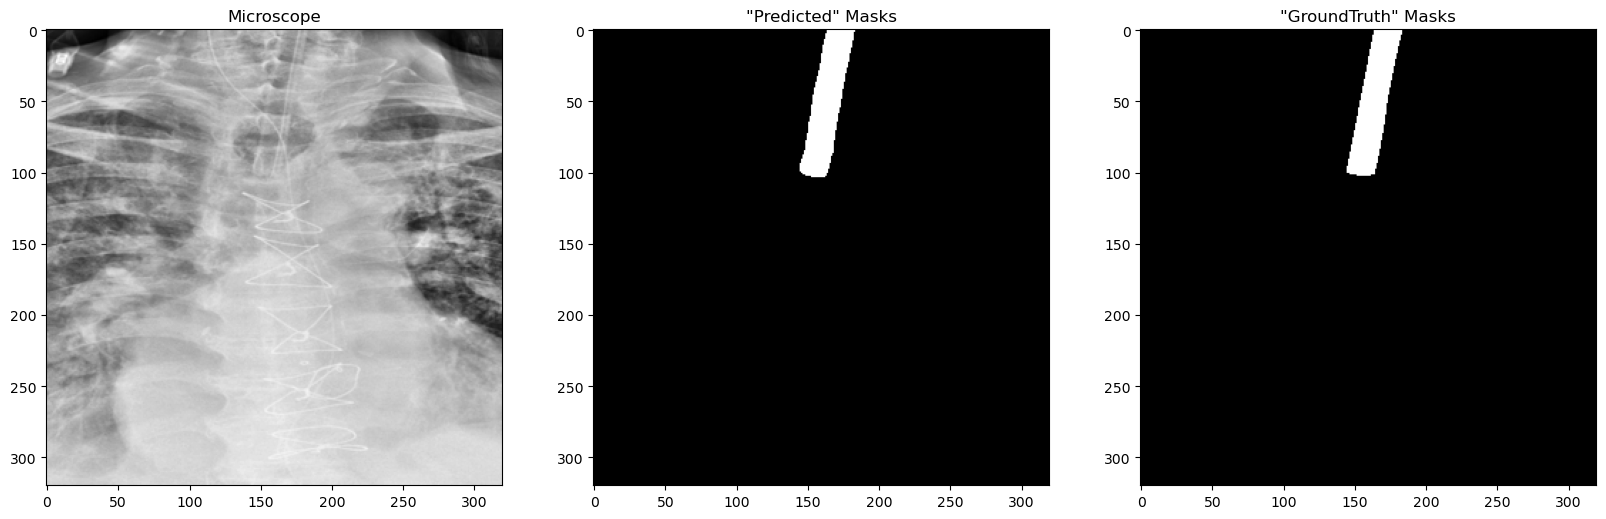

In [ ]:
# Check predict data
idx=1
f, axarr = plt.subplots(1,3)
f.set_size_inches(20,10)
axarr[0].imshow(fold1_test[idx])
axarr[0].set_title('Microscope')
axarr[1].imshow(np.where(Y_predict[idx]>0.5,255,0))
axarr[1].set_title('"Predicted" Masks')
axarr[2].imshow(fold1_testannot[idx])
axarr[2].set_title('"GroundTruth" Masks')
plt.show()

# mask還原和前處理以便做後面評估計算

In [ ]:
def mask_preprocess(mask_predict,idx,crop_fold1_testannot,init_fold1_testannot):
    crop_size = cv2.resize(mask_predict, ((crop_fold1_testannot[idx].shape)[1],(crop_fold1_testannot[idx].shape)[0]))
    # print(init_fold1_train[0][1])
    crop_size=np.where(crop_size>0.5,255,0)
    # print("還原回採剪圖：",crop_size.shape)
    final_img=cv2.copyMakeBorder(crop_size, 0,init_fold1_testannot[idx].shape[0]//4,init_fold1_testannot[idx].shape[1]//4,init_fold1_testannot[idx].shape[1]//4, cv2.BORDER_CONSTANT, value=0)#( top, bottom, left, right)
    # print("還原回最終：",final_img.shape)

    # print('init',init_fold1_testannot[idx].shape)    
    # print('final',final_img.shape)   



    #cv2.convertScaleAbs()函数将浮点数格式的灰度图像转换为8位无符号整数格式
    x=cv2.convertScaleAbs(final_img)
    #找出經過二值化圖像的輪廓圖
    contours1, hierarchy = cv2.findContours(x, 
                                            cv2.RETR_EXTERNAL,
                                            cv2.CHAIN_APPROX_NONE)
    #選出最大面積輪廓
    areas=[]
    # print(len(contours1))
    for i in range(len(contours1)):                                                                     
        areas.append(cv2.contourArea(contours1[i]))   
    max_id=areas.index(max(areas))
    # print(areas)
    # print(max_id)

    # 創建一個與原始圖像大小相同的全黑圖像
    mask = np.zeros((init_fold1_testannot[idx].shape[0],init_fold1_testannot[idx].shape[1]), dtype=np.uint8)
    #抓出的最大面積跟上面全黑圖像做結合
    ##cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset ]]]]])
    # 第一個引數是指明在哪幅影像上繪製輪廓；
    # 第二個引數是輪廓本身，在Python中是一個list。
    # 第三個引數指定繪製輪廓list中的哪條輪廓，如果是-1，則繪製其中的所有輪廓。後面的引數很簡單。其中thickness表明輪廓線的寬度，如果是-1（cv2.FILLED），則為填充模式。
    xx=cv2.drawContours(mask, contours1[max_id], -1, (255),cv2.FILLED)    

    # 使用膨脹和侵蝕操作填充輪廓內部
    kernel = np.ones((10,10), np.uint8)
    mask = cv2.dilate(xx, kernel, iterations=10)
    mask = cv2.erode(mask, kernel, iterations=10)

    # plt.imshow(init_fold1_testannot[idx])
    # plt.show()
    # plt.imshow(mask)
    # plt.show()

    return mask


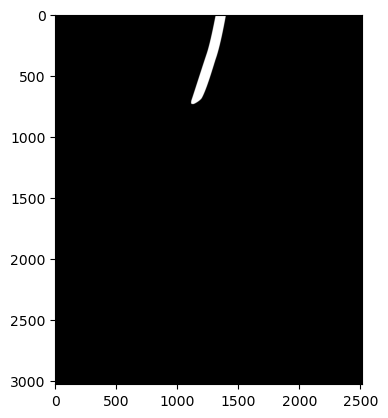

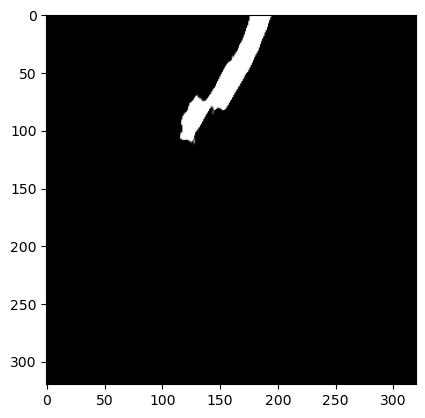

In [ ]:
plt.imshow(init_fold1_testannot[0])
plt.show()
plt.imshow(Y_predict[0])
plt.show()

In [ ]:
masks_distance=[]
for idx in range(len(Y_predict)):
    
    # idx=0
    mask_predict=Y_predict[idx]
    # print("原始圖：",init_fold1_testannot[idx].shape)
    # print("採剪圖：",crop_fold1_testannot[idx].shape)
    # print("最終：",fold1_testannot[idx].shape)
    pred_mask=mask_preprocess(mask_predict,idx,crop_fold1_testannot,init_fold1_testannot)
    # f, axarr = plt.subplots(1,2)
    # f.set_size_inches(20,10)
    # axarr[0].imshow(Y_predict[idx])
    # axarr[0].set_title('init_mask')
    # axarr[1].imshow(pred_mask)
    # axarr[1].set_title('Revised Mask')
    # plt.show()

    #計算原始mask長度
    for i,row in enumerate(init_fold1_testannot[idx]):
        # print(np.unique(row))
        if (np.any(row == 255)):
            init_length=i
    #計算預測mask長度        
    for i,row in enumerate(pred_mask):
        # print(np.unique(row))
        if (np.any(row == 255)):
            mask_length=i

    masks_distance.append(abs(mask_length-init_length))

count=0
count1=0
#計算2者y軸距離
for i in masks_distance:
    if i<=72 :  
        count+=1
    if i<=36:
        count1+=1    

print(f"平均誤差公分：{(sum(masks_distance)/len(masks_distance)/72)}cm  誤差在1.0cm內準確率：{(count/len(masks_distance)*100)}%  誤差在0.5cm內準確率：{(count1/len(masks_distance)*100)}%")

平均誤差公分：0.6498842592592592cm  誤差在1.0cm內準確率：87.5%  誤差在0.5cm內準確率：77.08333333333334%


In [ ]:
avg_error=sum(masks_distance)/len(masks_distance)
avg_error

46.791666666666664

In [ ]:
for i,row in enumerate(init_fold1_testannot[1]):
    # print(np.unique(row))
    if (np.any(row == 255)):
        length=i
print(length)

731


In [ ]:
for i,row in enumerate(pred_mask):
    # print(np.unique(row))
    if (np.any(row == 255)):
        length=i
print(length)

948


In [ ]:
# test=model.load_weights('best_model_1.h5')

In [ ]:
# history.history

In [ ]:
import pandas as pd
evl=pd.DataFrame({
                "loss(iou_seg)":history.history['loss'],
                "BCE_DICE_loss":history.history['BCE_DICE_loss'],
                "BCE":history.history['BCE'],
                "DICE":history.history['DICE'],
                "IoU":history.history['IoU'],
                "val_loss(iou_seg)":history.history['val_loss'],
                "val_BCE_DICE_loss":history.history['val_BCE_DICE_loss'],
                "val_BCE":history.history['val_BCE'],
                "val_DICE":history.history['val_DICE'],
                "val_IoU":history.history['val_IoU'],
                "lr":history.history['lr']})
evl.to_csv('fold5_transunet_4.csv', sep='\t',index=False)

In [ ]:
pd.read_csv("fold5_transunet_4.csv",sep='\t')

,loss(iou_seg),BCE_DICE_loss,BCE,DICE,IoU,val_loss(iou_seg),val_BCE_DICE_loss,val_BCE,val_DICE,val_IoU,lr
0,0.912614,0.853356,0.012008,0.839563,0.080223,0.979864,1.663381,0.702851,0.960531,0.019736,0.00010
1,0.842512,0.734508,0.005935,0.727861,0.136077,0.979904,2.354765,1.394151,0.960614,0.019694,0.00010
2,0.813223,0.690925,0.004481,0.685774,0.157122,0.977858,1.023342,0.066661,0.956681,0.021661,0.00010
3,0.778230,0.641572,0.003428,0.637306,0.181357,0.971655,0.946553,0.001673,0.944881,0.027571,0.00010
4,0.748529,0.602204,0.002918,0.599312,0.200355,0.968335,0.940146,0.001274,0.938872,0.030579,0.00010
...,...,...,...,...,...,...,...,...,...,...,...
95,0.102730,0.054583,0.000235,0.055236,0.472406,0.125955,0.067742,0.000279,0.067464,0.466298,0.00001
96,0.103250,0.054895,0.000237,0.055093,0.472480,0.127312,0.068633,0.000259,0.068374,0.465842,0.00001
97,0.106953,0.057043,0.000234,0.056576,0.471736,0.131259,0.070671,0.000313,0.070358,0.464850,0.00001
98,0.099373,0.052629,0.000220,0.052307,0.473871,0.122998,0.065890,0.000236,0.065653,0.467203,0.00001
